<a href="https://colab.research.google.com/github/joelcsadi/house-price-prediction/blob/main/house-price-prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Prices Kaggle Competition - Advanced Regression

This notebook trains a Random Forest Regressor Model to predict the prices of houses.
 The contents of this notebook include:

- ✅ Library Installation
- ✅ Data loading and Data Preprocessing
- ✅ EDA (Exploratory Data Analysis)
- ✅ Model training with cross-validation and predictions
- ✅ Submission

## 1. Library Import

In [7]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import warnings

warnings.filterwarnings('ignore', category =FutureWarning)

## 2. Data Loading and Data Preprocessing

In [8]:
# Base Data import
train_data = pd.read_csv("train.csv",index_col = 0) #/kaggle/input/house-prices-advanced-regression-techniques/train.csv"
test_data = pd.read_csv("test.csv", index_col = 0) #/kaggle/input/house-prices-advanced-regression-techniques/test.csv"

# Model Instance
RF_model = RandomForestRegressor(random_state = 1)

# X = Features (Train and Test) | Target Y
#X_features = ['MSSubClass','LotArea','PoolArea','OverallQual','YearBuilt','OverallCond','Fireplaces',"1stFlrSF",'2ndFlrSF','GrLivArea','FullBath']
#train_X =train_data[X_features]
train_y = train_data.SalePrice
#test_X = test_data[X_features]



In [9]:
# Pipelines for Numerical and Categorical
categorical_cols = [cname for cname in train_data.columns if train_data[cname].nunique() < 10 and
                        train_data[cname].dtype == "object"]

numerical_cols = [cname for cname in train_data.columns if train_data[cname].dtype in ['int64', 'float64'] and cname != 'SalePrice']
#print(train_data[numerical_cols].isnull().any())

selected_cols = numerical_cols + categorical_cols
train_X = train_data[selected_cols].copy()
test_X = test_data[selected_cols].copy()

num_pipeline = Pipeline([('imputer' , SimpleImputer(strategy = 'median'))])
cat_pipeline = Pipeline(steps =[('imputer', SimpleImputer(strategy = 'most_frequent')),
                                ('onehot',OneHotEncoder(handle_unknown = 'ignore' ))])

preprocessor = ColumnTransformer(transformers =[
    ('num', num_pipeline, numerical_cols),
    ('cat', cat_pipeline,categorical_cols)
])

# Combining Preprocessor and Random Forest into 1 pipeline
pipeline = Pipeline(steps = [
    ('preprocessor',preprocessor),
    ('model',RF_model)
])


pipeline.fit(train_X,train_y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFull...
                                                   'LotConfig', 'LandSlope',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'RoofMatl',
                                                   'MasVnrType', 'ExterQual',
                                                   'ExterCond', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', 'KitchenQual',
                                                   'Functional', 'FireplaceQu', ...])])),
                ('model', RandomForestRegressor(random_state=1))])

# 3. EDA - Exploratory Data Analysis

<Axes: xlabel='1stFlrSF', ylabel='SalePrice'>

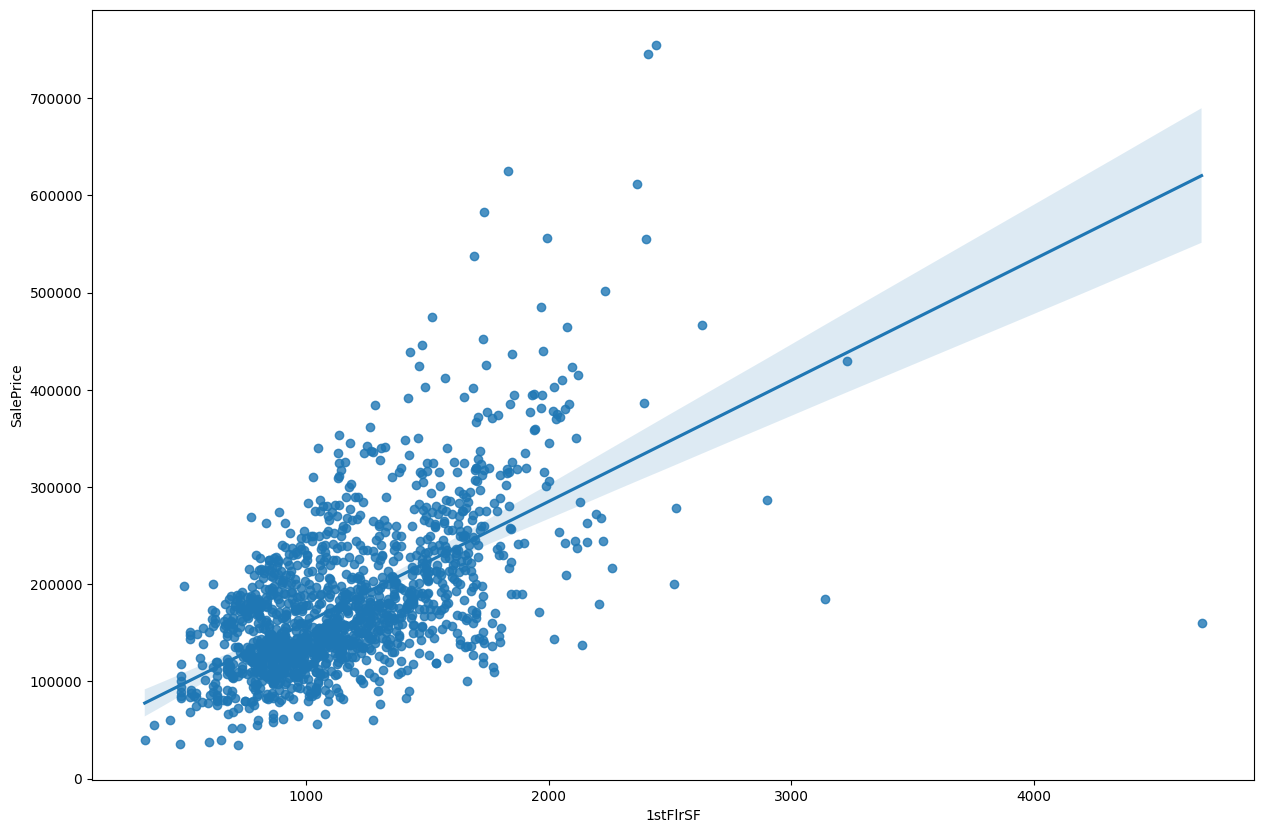

In [10]:

plt.figure(figsize=(15, 10))
#sns.kdeplot(data=train_data, x='LotArea', fill = True, hue = 'LotShape')
#sns.lmplot(data=train_data, x='LotArea',y = 'SalePrice', hue = 'Functional')
#train_data.Functional.value_counts()
#sns.kdeplot(data=train_data, x='SalePrice', hue = 'BldgType', fill = True )
#sns.boxplot(data=train_data, y='SalePrice', x = 'Fireplaces')
#sns.kdeplot(data=train_data, x = 'MiscVal')
#sns.kdeplot(data=train_data, x = 'Fireplaces', fill = True)
sns.regplot(data=train_data, y='SalePrice', x = '1stFlrSF')
#sns.regplot(data=train_data, y='SalePrice', x = 'GarageArea')
#sns.heatmap(train_X[numerical_cols].corr(), annot=True)
#sns.kdeplot(data=train_data, x='LotFrontage', fill = True, hue = "Neighborhood")
#train_data.Neighborhood.value_counts()

## 3. Model training with cross-validation and predictions

In [11]:
y_pred = pipeline.predict(test_X)

scores = -1 * cross_val_score(pipeline, train_X, train_y,
                             cv =5,
                             scoring = 'neg_mean_absolute_error')

print("Average MAE Score: ", scores.mean())

Average MAE Score:  17703.416054794518


##4. Submission

In [12]:
submission = pd.DataFrame({"SalePrice":y_pred},index=test_X.index)
submission.to_csv("submission.csv")